In [2]:
import numpy as np
import pygimli as pg
from pygimli.physics import ert
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
from pygimli.viewer.mpl import draw1DColumn


In [3]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/'

In [4]:
data = ert.load('//smb.isipd.dmawi.de/projects/sparc/data/Sensors_Mobile/202307_DEPTHAW_InuvikTuk/IRISSyscalProSwitch/res2Dinv/ERT_data_eastern_amphibious_DAT_raw.txt')

In [5]:
data_topo = ert.load('//smb.isipd.dmawi.de/projects/sparc/data/Sensors_Mobile/202307_DEPTHAW_InuvikTuk/IRISSyscalProSwitch/res2Dinv/ERT_data_eastern_amphibious_DAT_no_std_filter_with_err.dat')

12/11/25 - 17:29:03 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


In [6]:
data_topo_water = ert.load('//smb.isipd.dmawi.de/projects/sparc/data/Sensors_Mobile/202307_DEPTHAW_InuvikTuk/IRISSyscalProSwitch/res2Dinv/ERT_data_eastern_amphibious_DAT_no_std_filter_with_err_water.dat')

12/11/25 - 17:29:04 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x22ffd4d6810>)

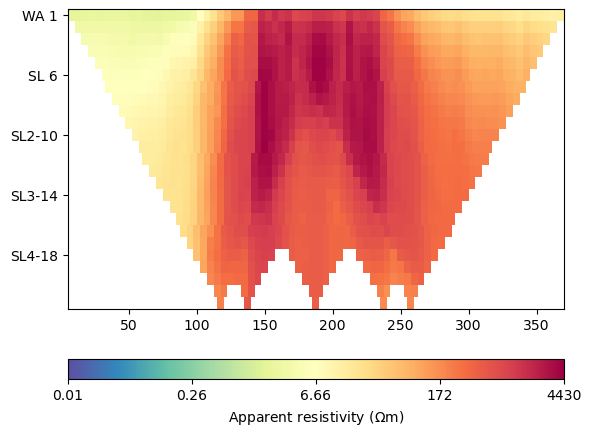

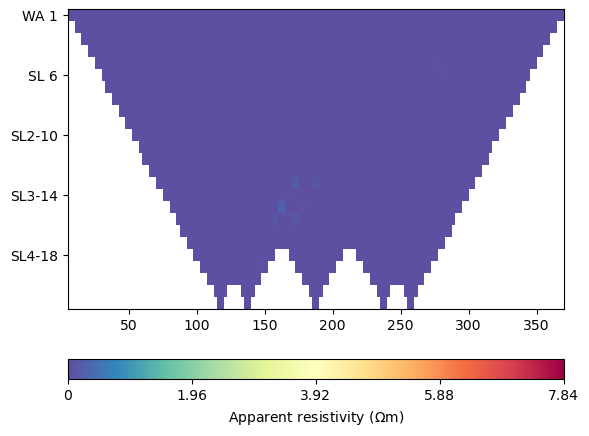

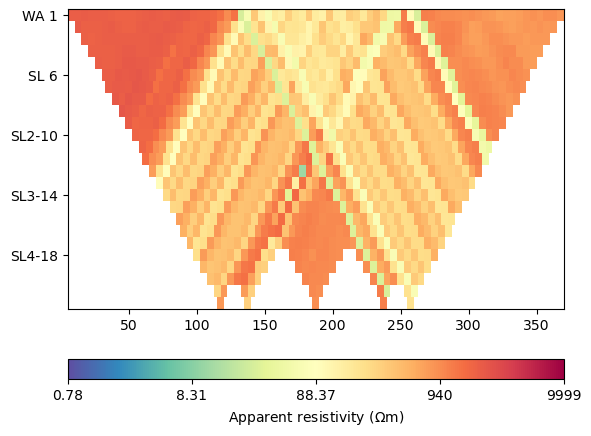

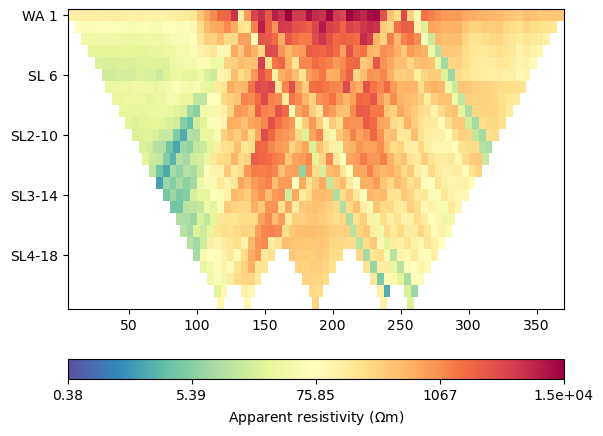

In [6]:
ert.show(data)
ert.show(data, data['err'])
ert.show(data, data['i'])
ert.show(data, data['u'])

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x21b5da9a610>)

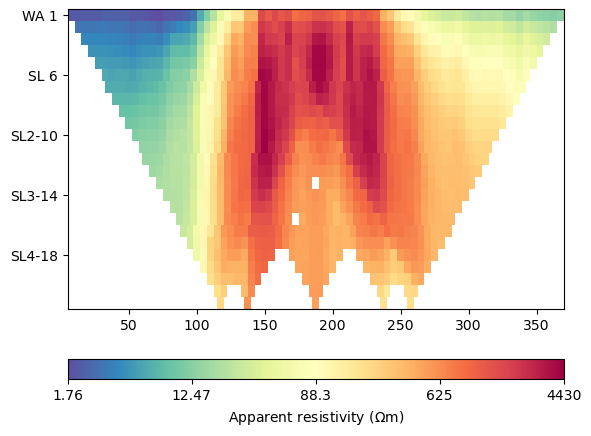

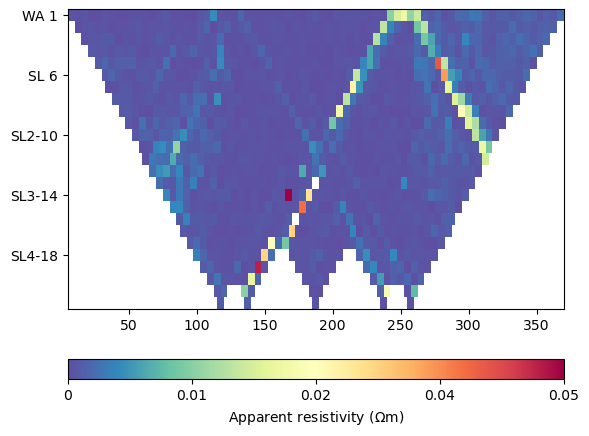

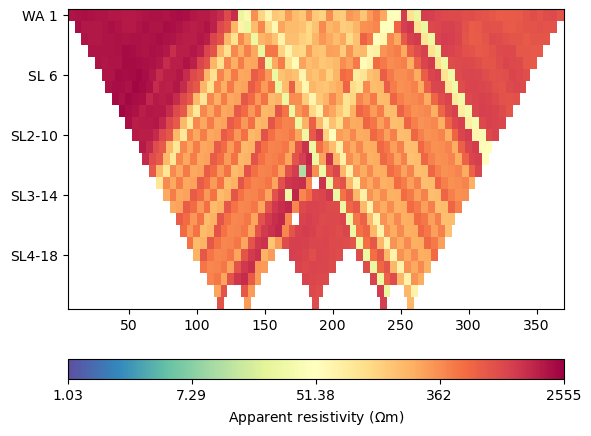

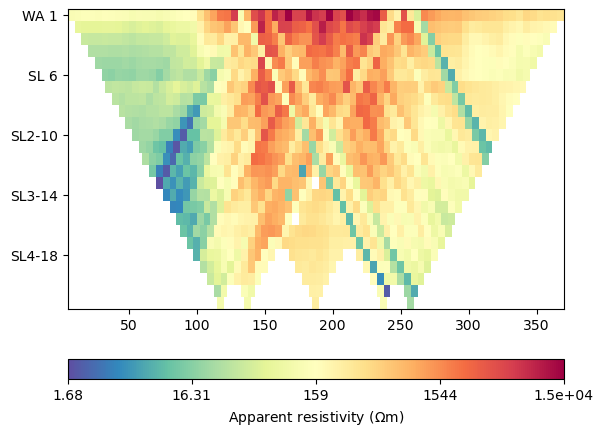

In [7]:
data.remove(data['err']>=0.05)
data.remove(data['i'] < 1)
data.remove(data['rhoa'] <= 0)
ert.show(data)
ert.show(data, data['err'])
ert.show(data, data['i'])
ert.show(data, data['u'])

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x22ffd49bc10>)

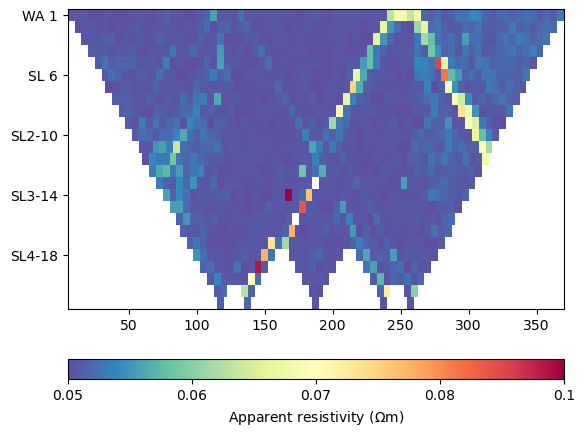

In [8]:
data['err'] = data['err'] + ert.estimateError(data, relativeError=0.05, absoluteUError=5e-4)
ert.show(data, data['err'])

In [8]:
data['k'] = ert.createGeometricFactors(data)
data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data_topo.additionalPoints(), pg.x(data_topo)))
data['k_topo'] = ert.createGeometricFactors(data, numerical=True)

12/11/25 - 17:29:47 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\miniconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 1): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\12260544744149723894
12/11/25 - 17:29:47 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\miniconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (5.6s x 1): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\12912472542937254800


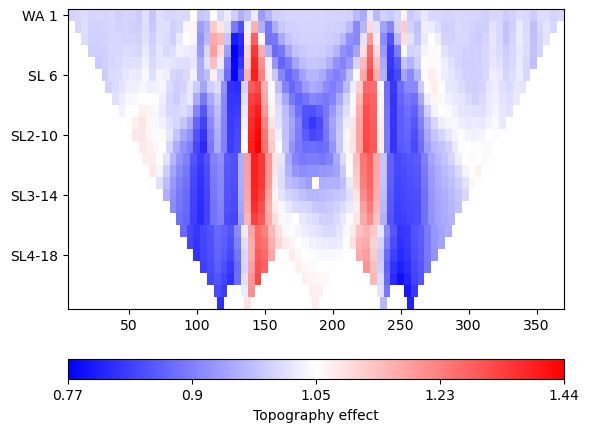

In [9]:
_ = ert.showData(data, vals=data['k_topo']/ data['k'], label='Topography effect',
                 logScale=True, cMap="bwr")

In [10]:
data['rhoa'] = data['r']*data['k_topo']

In [11]:
mgr = ert.ERTManager(data)

In [12]:
pg.y(data)

76 [-2.524, -2.5679982964189434, -2.6449878899349377, -2.5890123198015424, -2.5600068679577417, -2.5440038711817685, -2.363162242690708, -2.2481335280569166, -2.036436306149511, -2.0080581152408263, -1.8713356454700718, -2.003627119579219, -2.0149691228121536, -2.2033349702475347, -2.556861708056542, -2.5937877994962233, -3.092418511881321, -3.0614128302576677, -3.2329544385294504, -2.9439762357797923, -2.9370405071470063, -2.775301348658318, -1.296138152486638, -0.10610401556289317, 0.39474996180235566, 1.285986802847587, 2.2239513365184505, 4.991310007926494, 7.660001005980821, 9.034452708033257, 9.196248603340814, 9.282960082, 9.282960082, 9.282960082, 9.282960082, 9.282960082, 9.282960082, 9.282960082, 9.282960082, 9.282960082, 9.282960082, 9.282960082, 9.282960082, 9.242470666737, 9.155221920656215, 9.067973174503143, 8.03852826733414, 5.91579644383996, 3.7838619737666788, 1.9252349161734448, 1.6110197957888581, 0.7555804465482879, 0.0, 0.0, 0.0, -0.014587198782807408, -0.14106006

In [13]:
x_coords = pg.x(data)
y_coords = pg.y(data)

# Replace negative y-values with 0
y_coords = [y if y >= 0 else 0 for y in y_coords]

# Combine into pg.Pos objects
new_positions = [pg.Pos(x, y) for x, y in zip(x_coords, y_coords)]

# Update the dataset
data_topo_water.setSensorPositions(new_positions)

In [14]:
df = pd.DataFrame({"x": pg.x(data), "y": pg.y(data)})

new_rows = pd.DataFrame({
    "x": [-11, 381],
    "y": [-2.5, -2.75]
})


df_out = pd.concat([
    new_rows.iloc[[0]],
    df,
    new_rows.iloc[[1]]   
], ignore_index=True)

df_out = df_out.sort_values("x").reset_index(drop=True)

left = df_out[:26]
right = df_out[55:]
left

,x,y
0,-11.000000,-2.500000
1,0.000000,-2.524000
2,4.999806,-2.567998
3,9.999214,-2.644988
4,14.998900,-2.589012
5,19.998816,-2.560007
6,24.998790,-2.544004
7,29.995518,-2.363162
8,34.994194,-2.248134
9,39.989710,-2.036436


0 -9.999612822487125 0.0 0.0
1 -9.999612822487125 -148.20671440166285 0.0
2 380.5163988266442 -148.20671440166285 0.0
3 380.5163988266442 0.0 0.0
4 -1492.0667568391154 0.0 0.0
5 -1492.0667568391154 -1630.2738584182912 0.0
6 1862.5835428432727 0.0 0.0
7 1862.5835428432727 -1630.2738584182912 0.0
8 0.0 0.0 0.0
9 2.499903205621781 0.0 0.0
10 4.999806411243562 0.0 0.0
11 7.499510021691179 0.0 0.0
12 9.999213632138797 0.0 0.0
13 12.499056824929113 0.0 0.0
14 14.998900017719428 0.0 0.0
15 17.498857943537157 0.0 0.0
16 19.998815869354885 0.0 0.0
17 22.498803062526136 0.0 0.0
18 24.998790255697386 0.0 0.0
19 27.497154206706316 0.0 0.0
20 29.995518157715246 0.0 0.0
21 32.494856295011616 0.0 0.0
22 34.99419443230798 0.0 0.0
23 37.49195209646636 0.0 0.0
24 39.98970976062474 0.0 0.0
25 42.48966601952431 0.0 0.0
26 44.989622278423866 0.0 0.0
27 47.48868622187486 0.0 0.0
28 49.98775016532585 0.0 0.0
29 52.486866052197115 0.0 0.0
30 54.985981939068374 0.0 0.0
31 57.485973426841795 0.0 0.0
32 59.98596

(-30.0, 390.0)

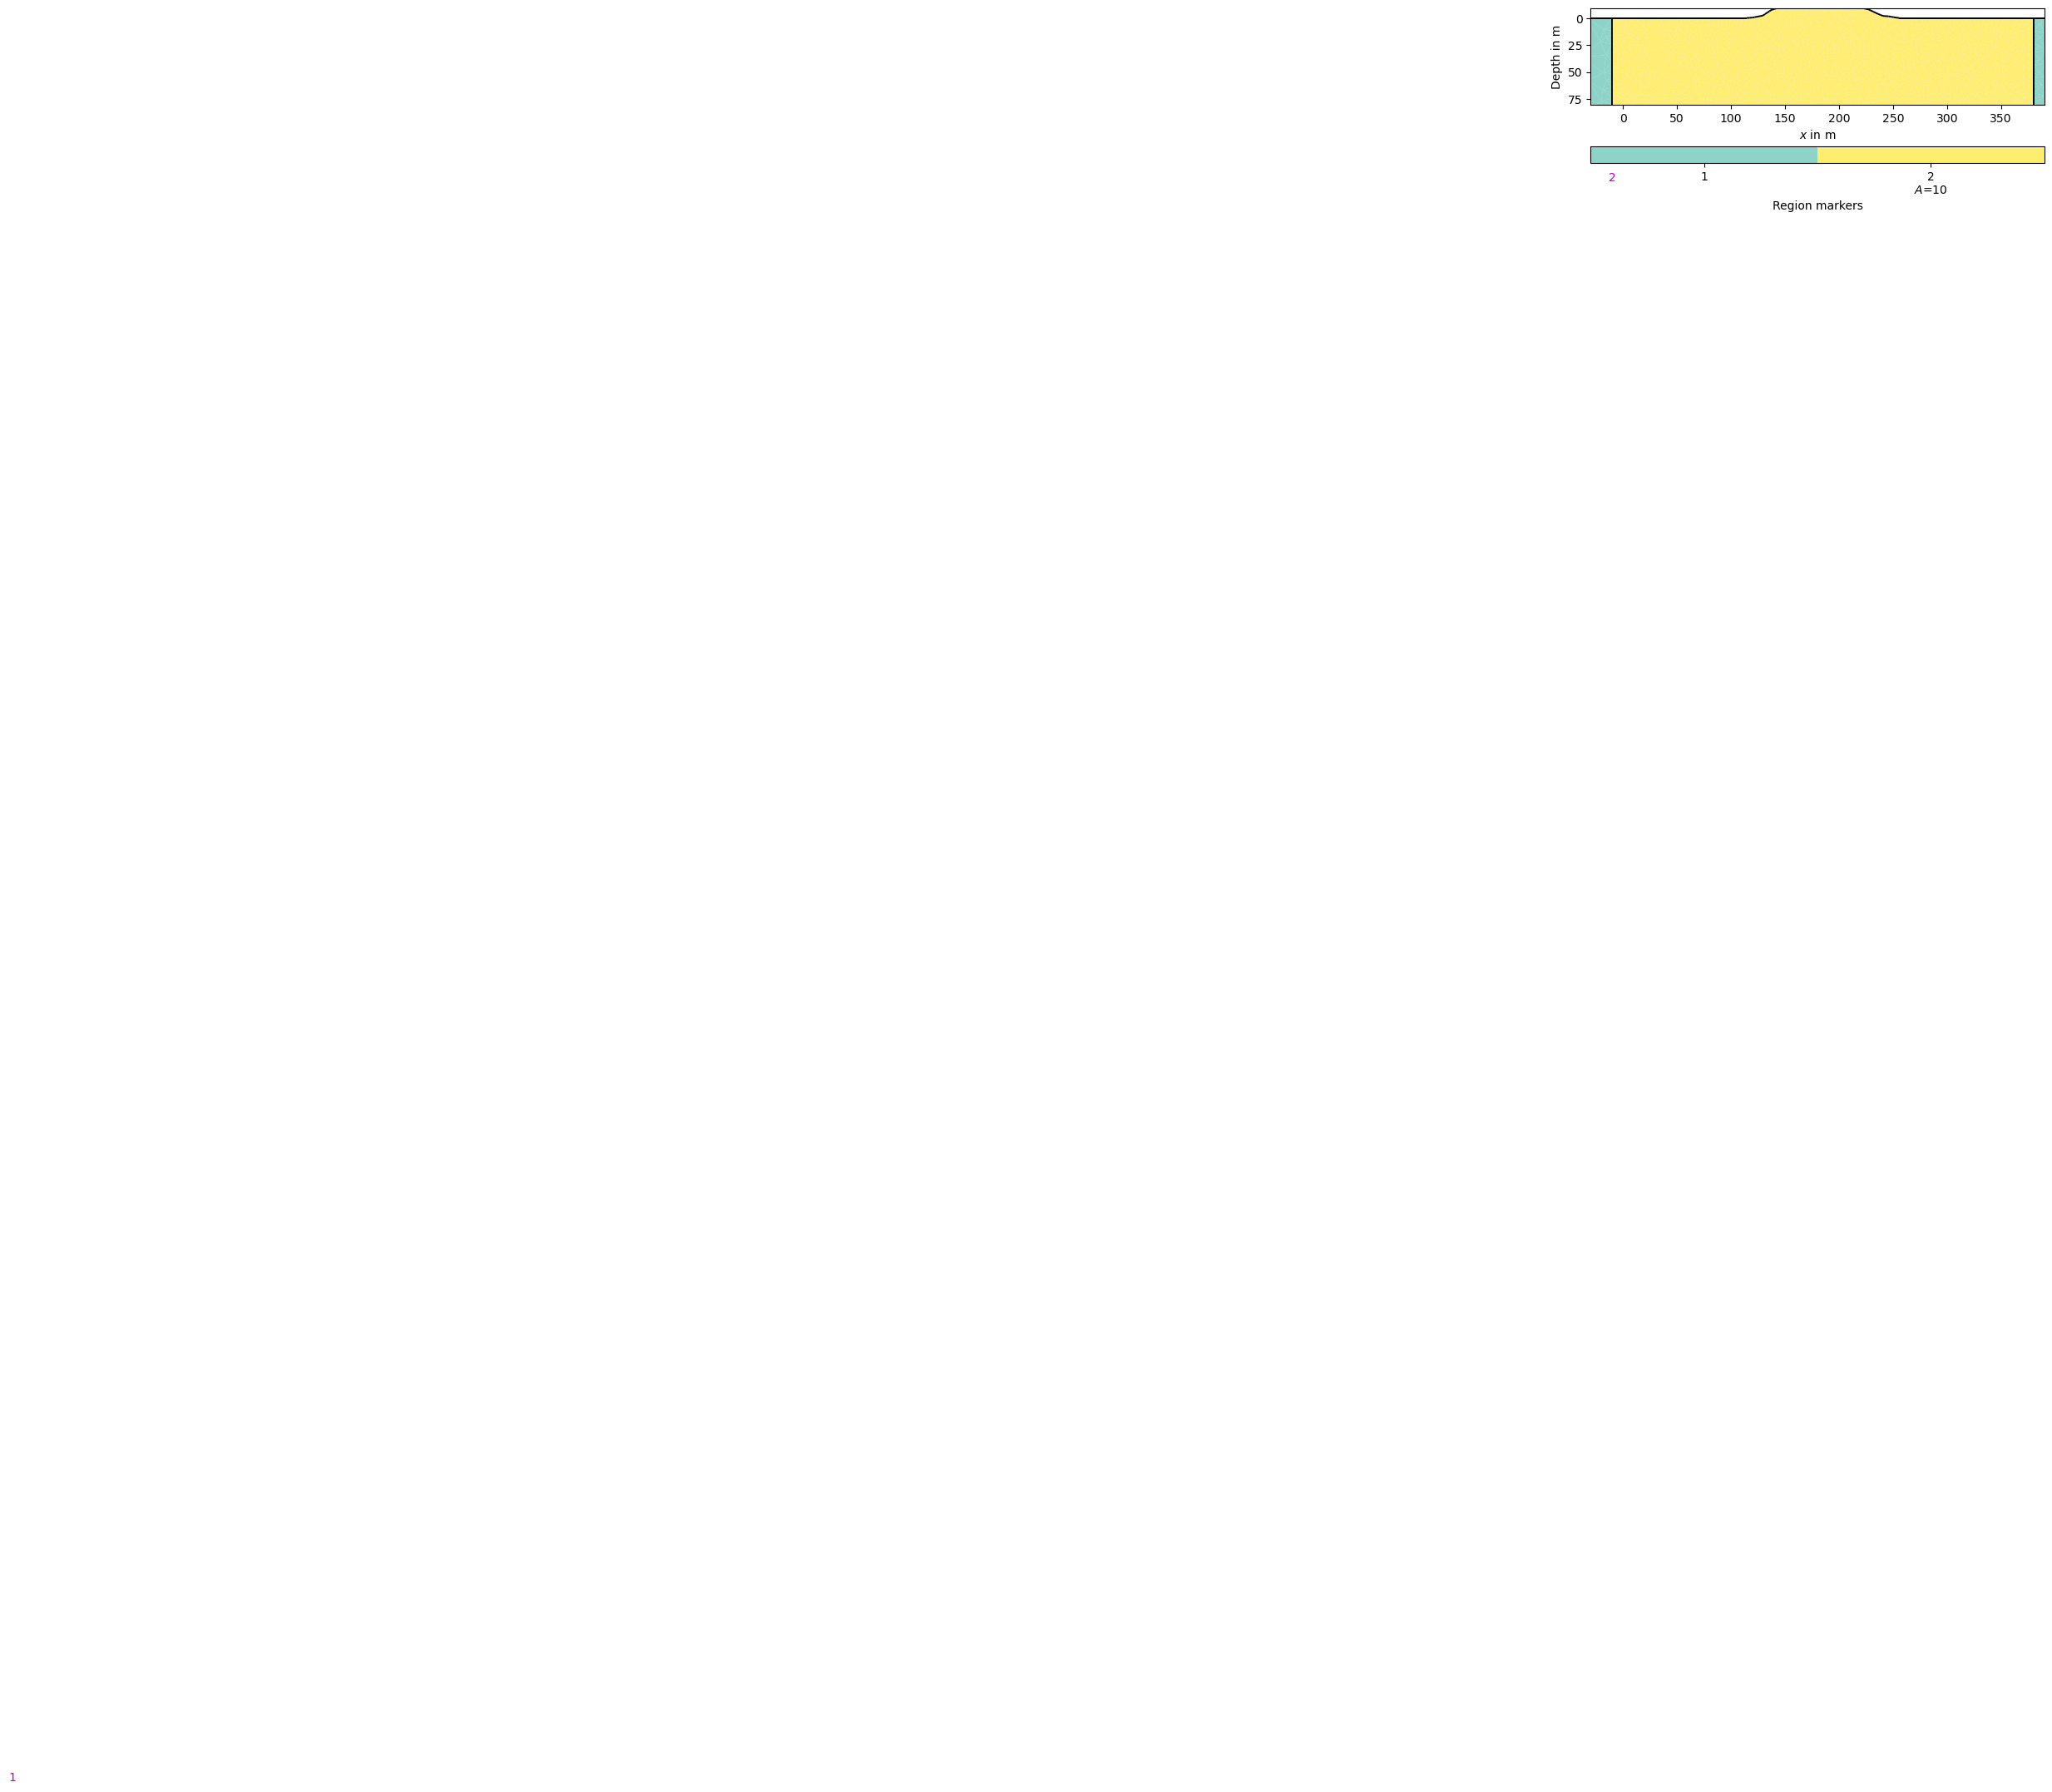

In [23]:
plc = mt.createParaMeshPLC(data_topo_water, paraMaxCellSize=10)
for i, n in enumerate(plc.nodes()[:]):
    #ax.text(n.x(), n.y(), str(i))
    print(i, n.x(), n.y(), n.z())
for nr, marker in enumerate(plc.regionMarkers()):
    print('Position marker number {}:'.format(nr + 1), marker.x(), marker.y(),
          marker.z())


ax, _ = pg.show(plc)
ax.set_ylim(-80)
ax.set_xlim(-30,390)

(-30.0, 390.0)

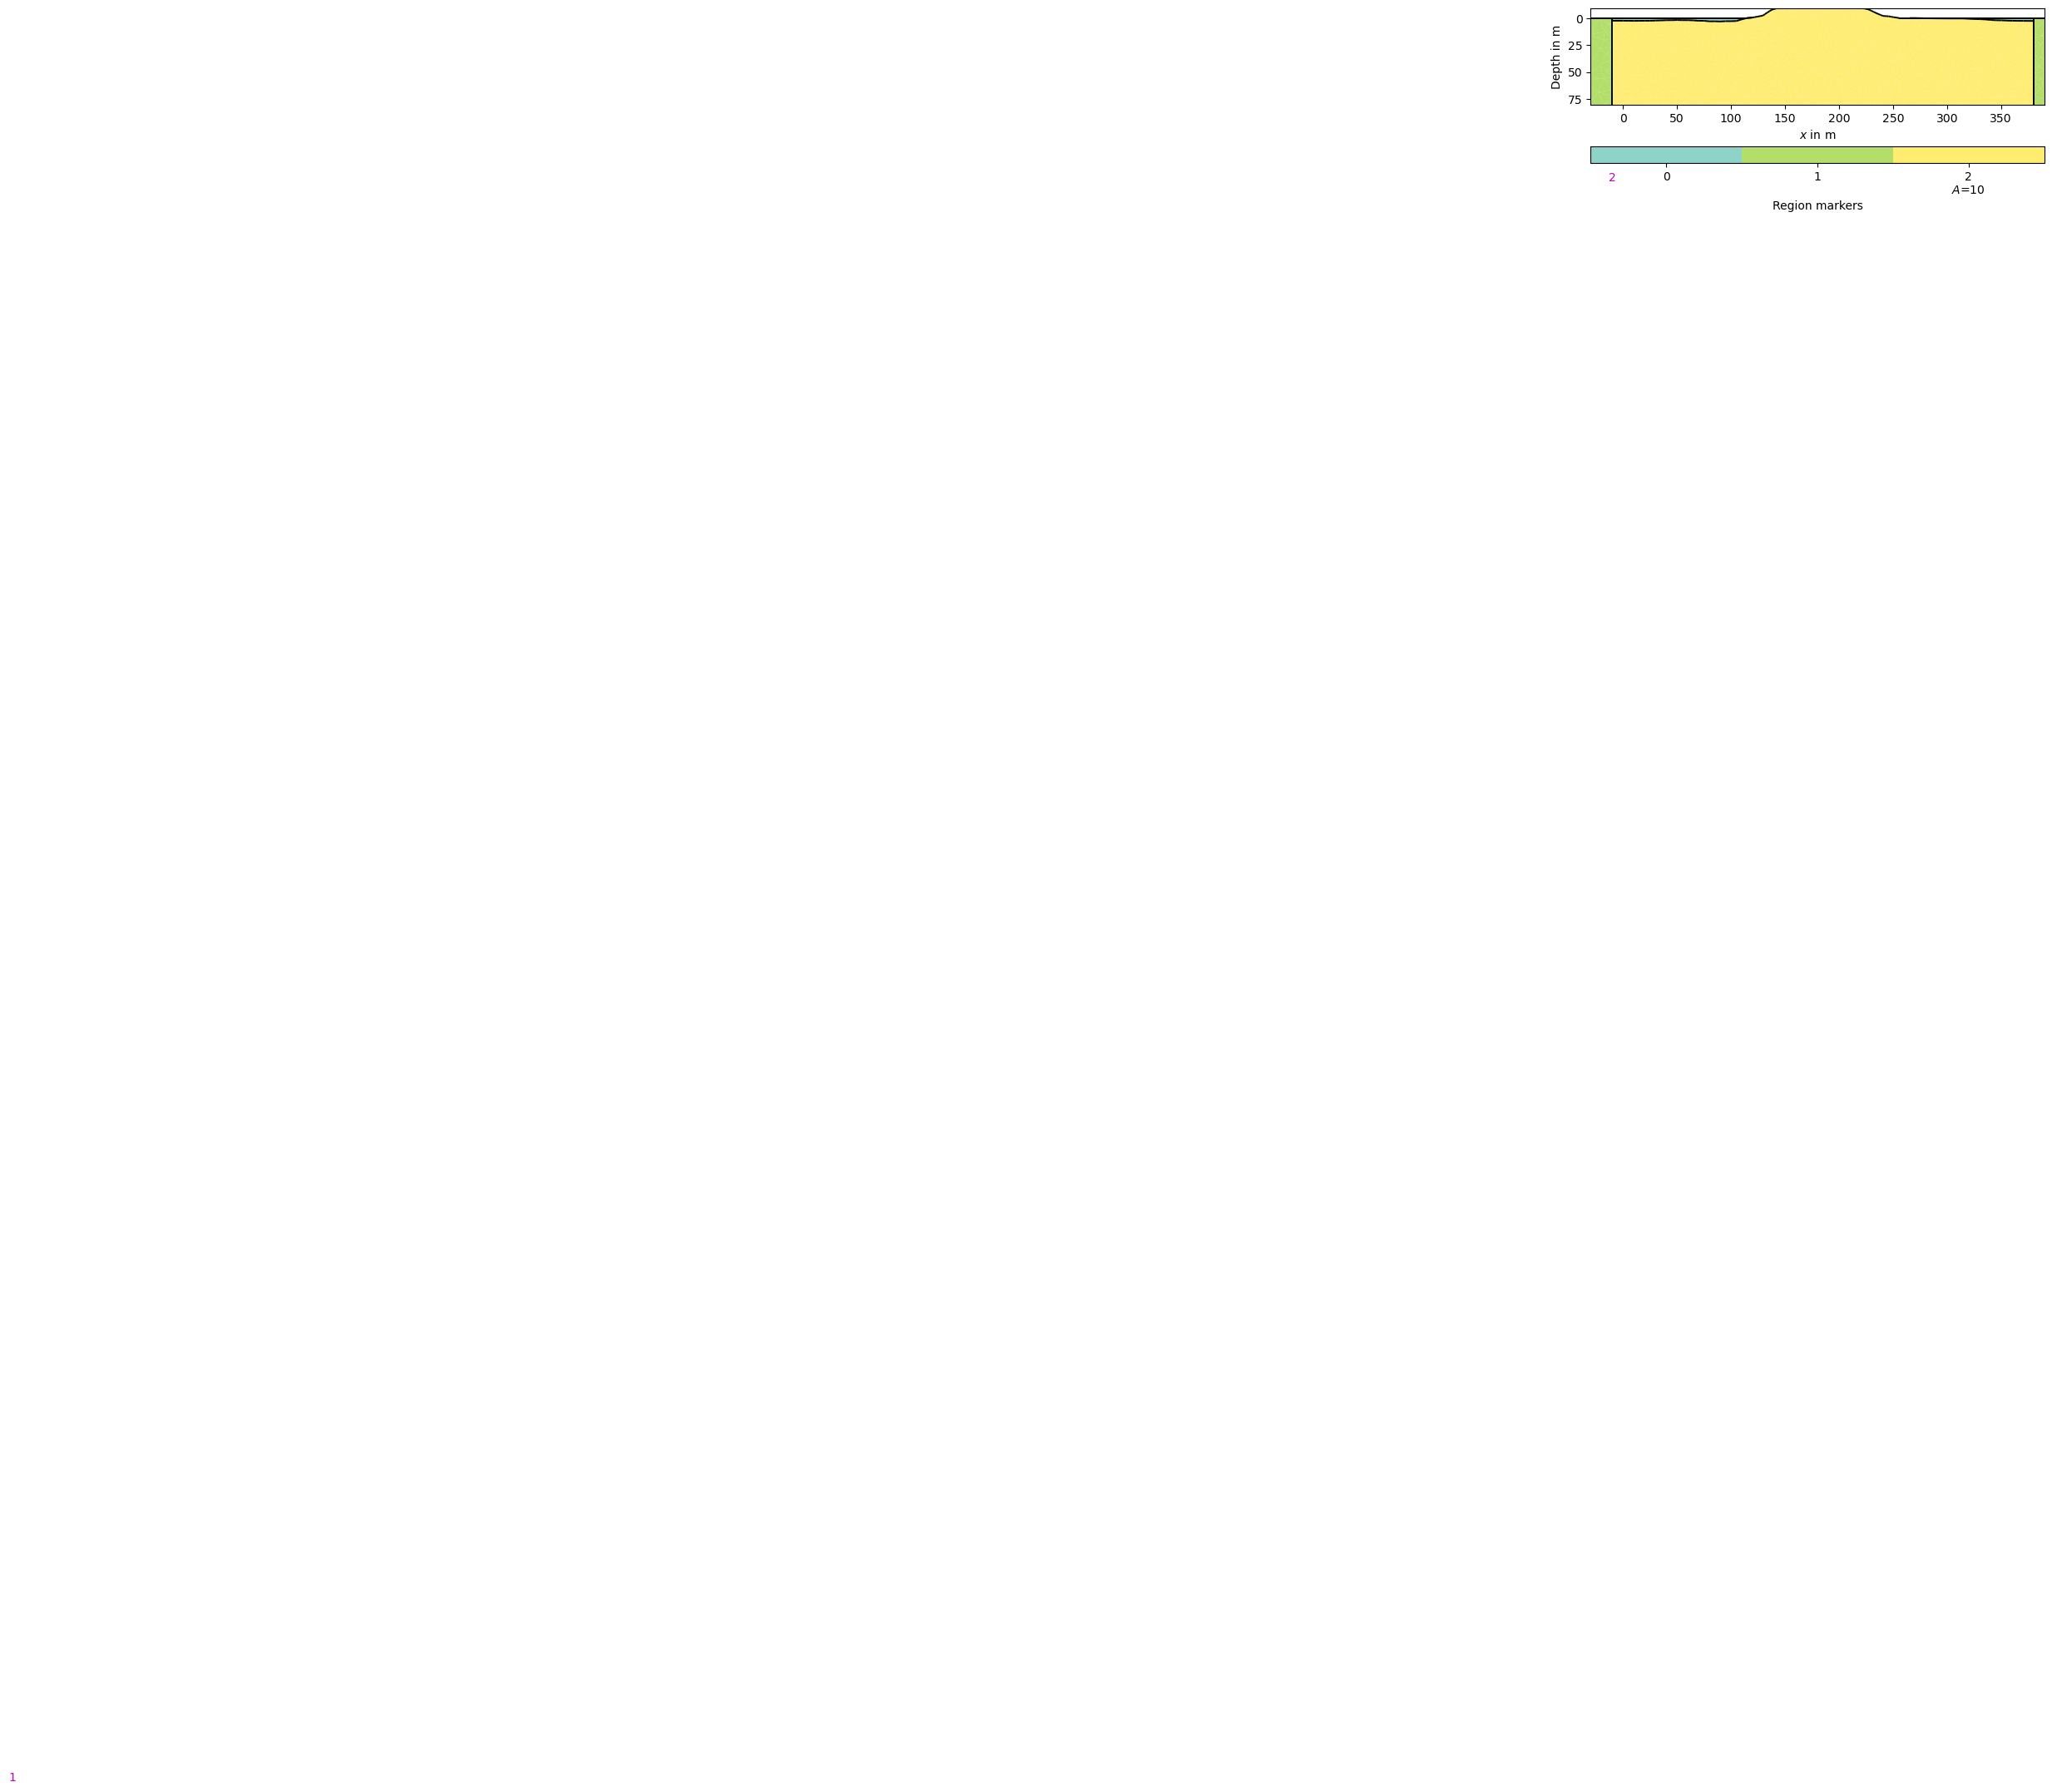

In [24]:
verts_left = left[["x", "y"]].values.tolist()
verts_right = right[["x", "y"]].values.tolist()
line1 = mt.createPolygon(verts_left, boundaryMarker=-1)
line2 = mt.createPolygon(verts_right, boundaryMarker=-1)


# Add polygon to mesh
plc2 = plc + line1 + line2



ax, _ = pg.show(plc2)
ax.set_ylim(-80)
ax.set_xlim(-30,390)

(-30.0, 390.0)

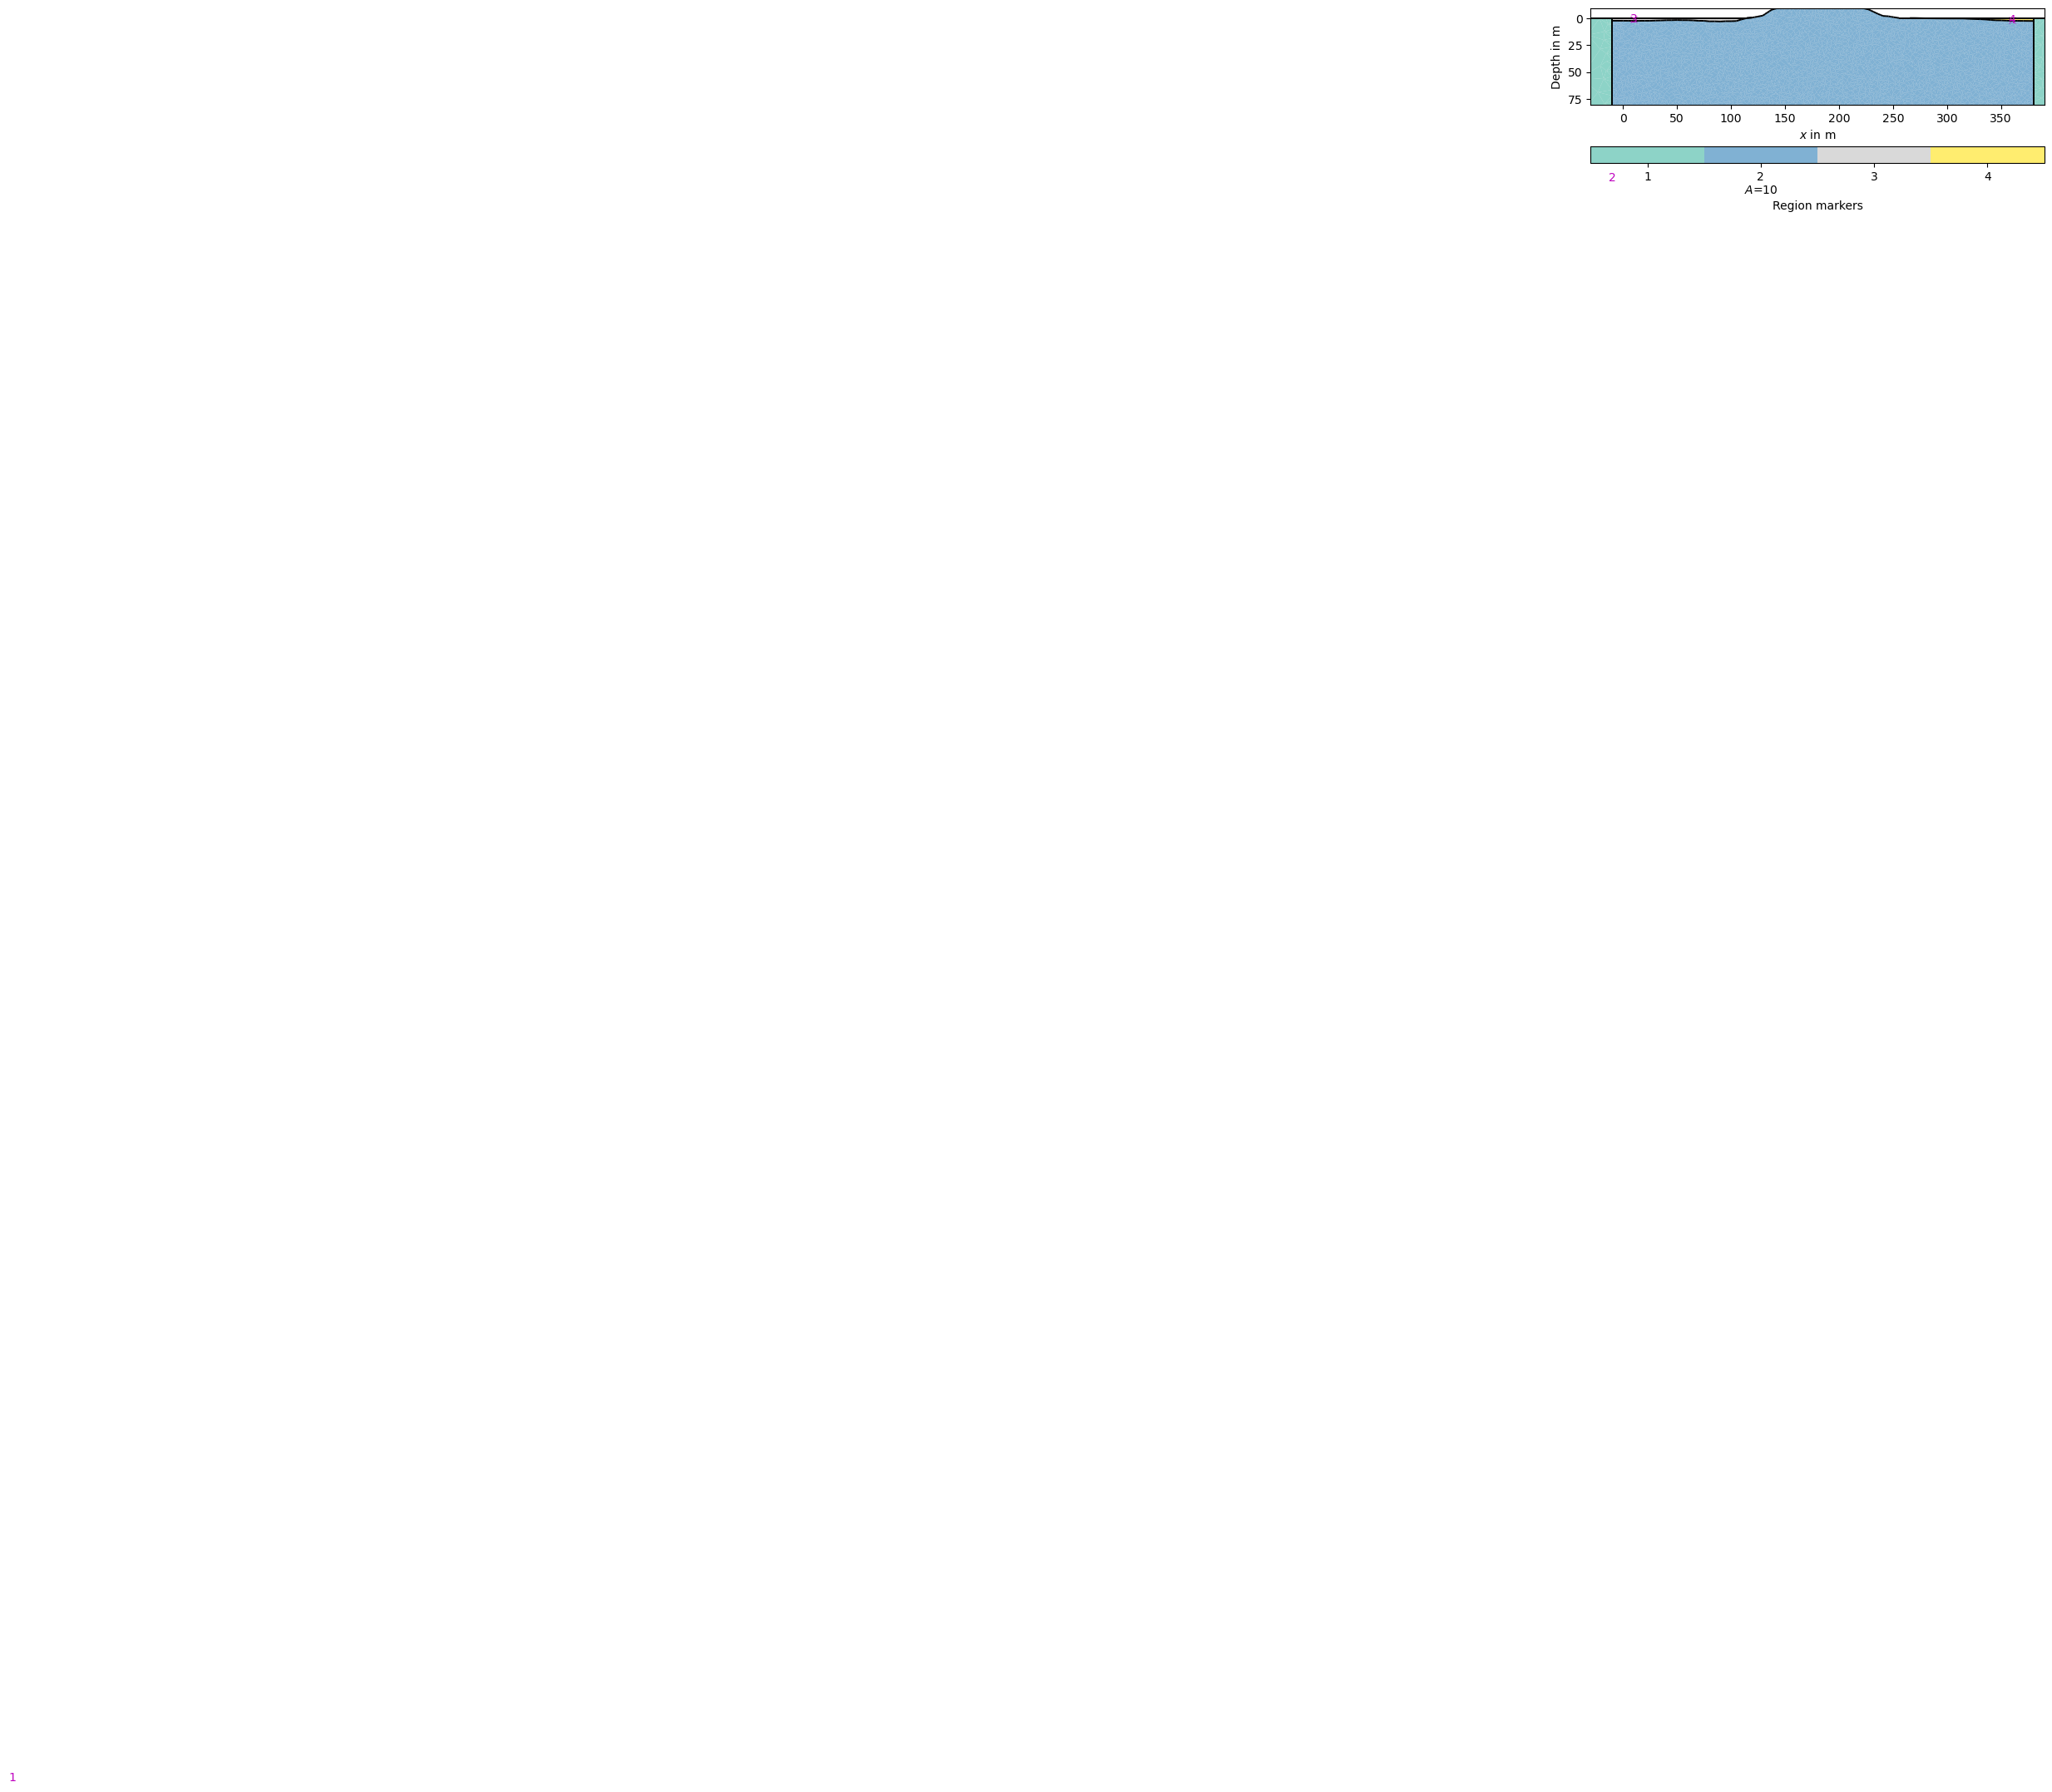

In [25]:
plc2.addRegionMarker([10, -1], marker=3)  

plc2.addRegionMarker([360, -1.5], marker=4)  

ax, _ = pg.show(plc2)
ax.set_ylim(-80)
ax.set_xlim(-30,390)

0 -10.0 -2.524 0.0
1 -10.0 -150.85846355054932 0.0
2 380.5167860041571 -150.85846355054932 0.0
3 380.5167860041571 -2.6517491488864673 0.0
4 -1492.0671440166284 -2.524 0.0
5 -1492.0671440166284 -1632.797858418291 0.0
6 1862.5839300207854 -2.6517491488864673 0.0
7 1862.5839300207854 -1632.9256075671776 0.0
8 0.0 -2.524 0.0
9 1.2499516028108906 -2.5349995741047358 0.0
10 3.749854808432672 -2.5569987223142077 0.0
11 4.999806411243562 -2.5679982964189434 0.0
12 6.249658216467371 -2.587245694797942 0.0
13 8.749361826914988 -2.625740491555939 0.0
14 9.999213632138797 -2.6449878899349377 0.0
15 11.249135228533955 -2.630993997401589 0.0
16 13.74897842132427 -2.603006212334891 0.0
17 14.998900017719428 -2.5890123198015424 0.0
18 16.24887898062829 -2.581760956840592 0.0
19 18.748836906446023 -2.567258230918692 0.0
20 19.998815869354885 -2.5600068679577417 0.0
21 21.24880946594051 -2.556006118763748 0.0
22 23.74879665911176 -2.548004620375762 0.0
23 24.998790255697386 -2.5440038711817685 0.0
24 2

(-30.0, 390.0)

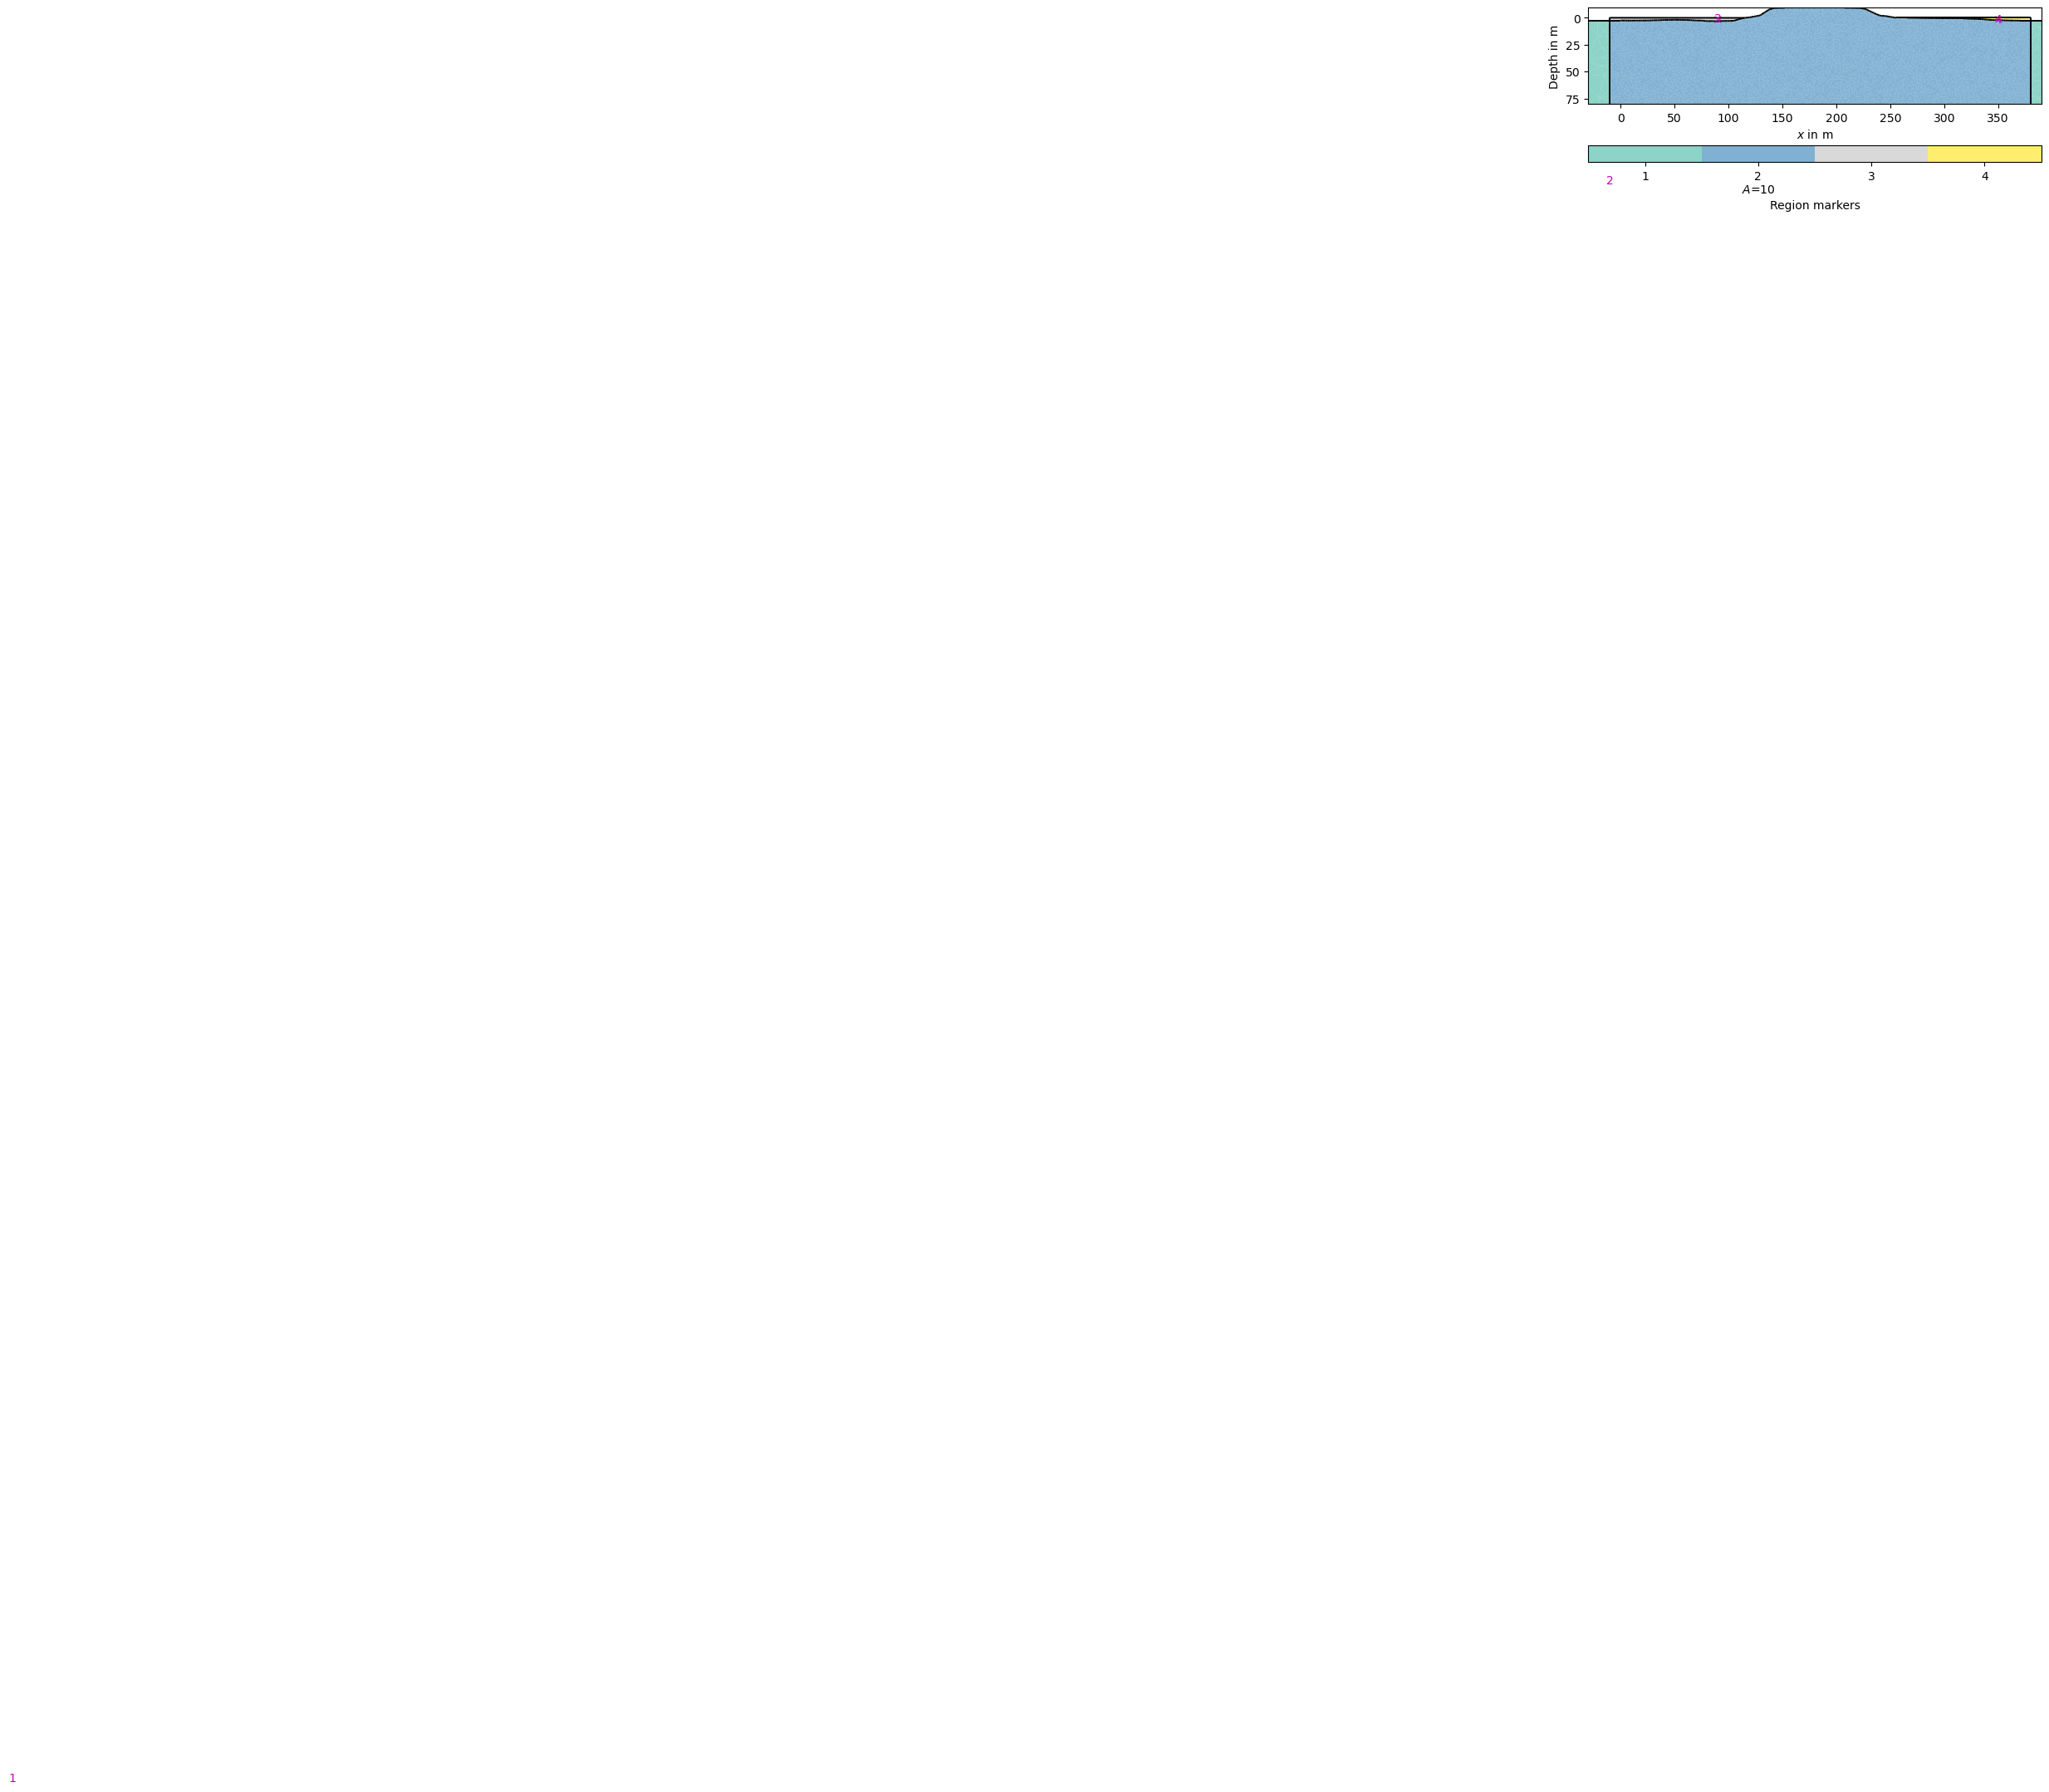

In [84]:
plc = mt.createParaMeshPLC(data,paraDX = 0.25, paraDZ= 0.25, paraMaxCellSize=10)
for i, n in enumerate(plc.nodes()[:]):
    #ax.text(n.x(), n.y(), str(i))
    print(i, n.x(), n.y(), n.z())
for nr, marker in enumerate(plc.regionMarkers()):
    print('Position marker number {}:'.format(nr + 1), marker.x(), marker.y(),
          marker.z())
mesh = mt.createMesh(plc2)

plc.createNode(-10, 0, 0, marker=234)
#plc.createNode(113.5, 0, 0, marker=235)

plc.createNode(380.5167860041571, 0, 0, marker=235)

plc.createEdge(plc.node(234), plc.node(77), marker=-1)
plc.createEdge(plc.node(234), plc.node(0), marker=-1)
plc.createEdge(plc.node(164), plc.node(235), marker=-1)
plc.createEdge(plc.node(235), plc.node(3), marker=-1)

plc.addRegionMarker([90, -1], marker=3)  
plc.addRegionMarker([350, -1.5], marker=4)  

ax, _ = pg.show(plc)
ax.set_ylim(-80)
ax.set_xlim(-30,390)


(-10.0, 381.0)

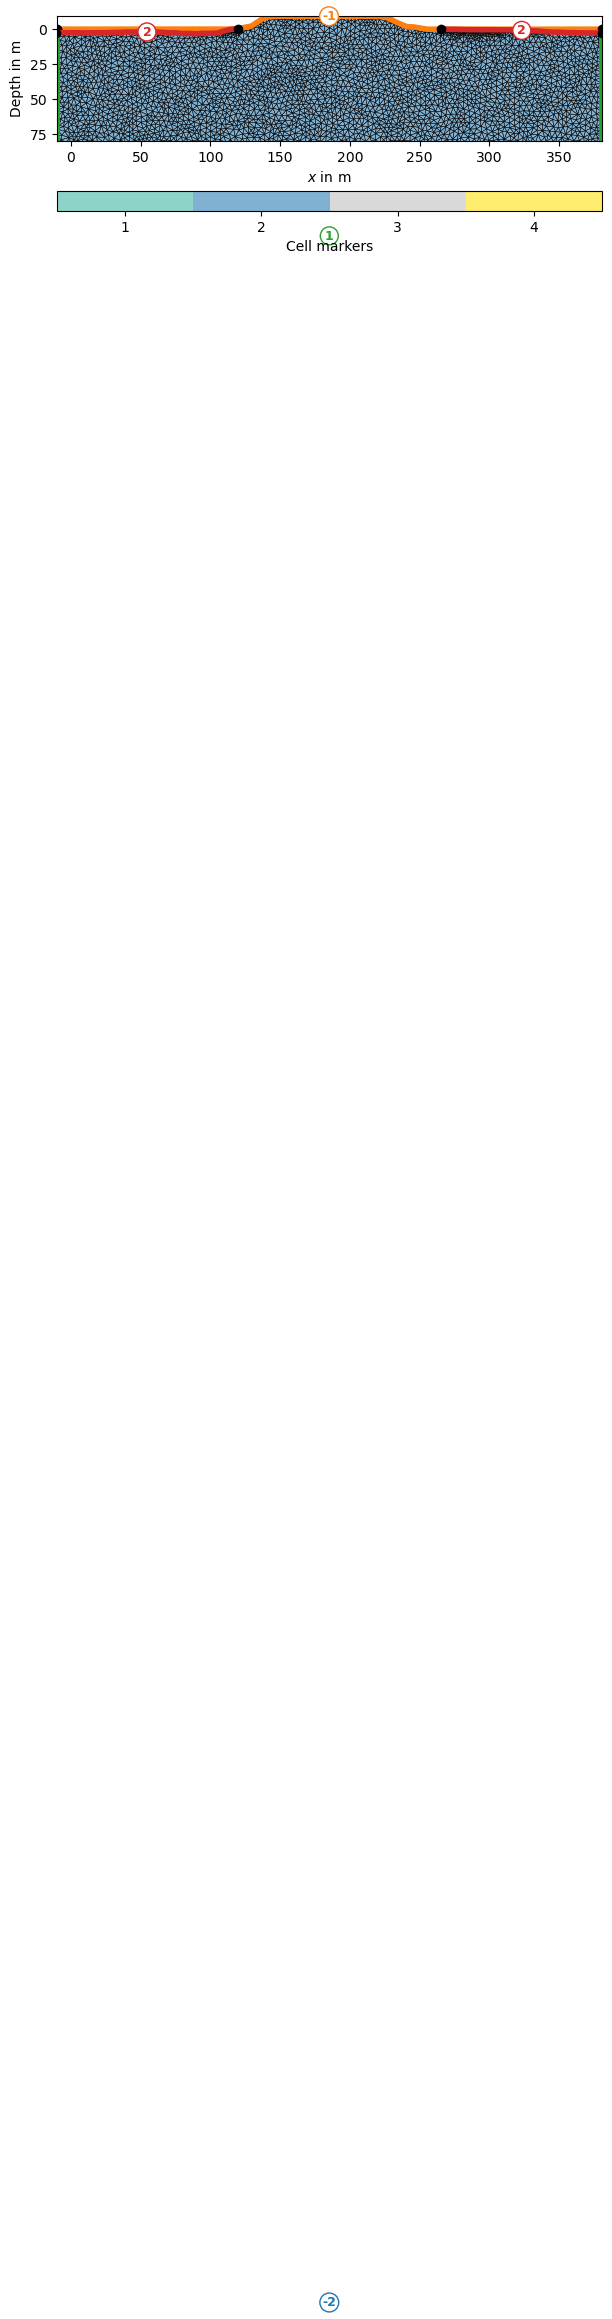

In [26]:
mesh = mt.createMesh(plc2)
for b in mesh.boundaries():
    if b.marker() == -1 and not b.outside():
        b.setMarker(2)

#print(mesh)
ax, _ = pg.show(mesh, markers=True, showMesh=True)
ax.set_ylim(-80)
ax.set_xlim(-10,381)

In [27]:
data
data['k_new'] = ert.createGeometricFactors(data, mesh=mesh, numerical=True)
data['rhoa'] = (data['r'])*data['k_new']

11/11/25 - 18:23:47 - pyGIMLi - INFO - Save RVector binary
11/11/25 - 18:23:47 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\9644845405125201696


12/11/25 - 08:00:53 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_eastern_new_rhoa_updated\ERTManager


Path //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_eastern_new_rhoa_updated\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_eastern_new_rhoa_updated\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

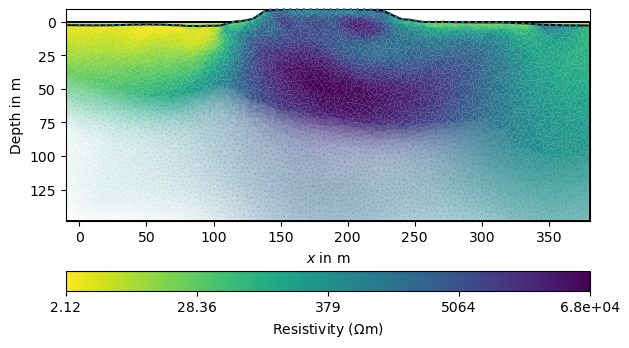

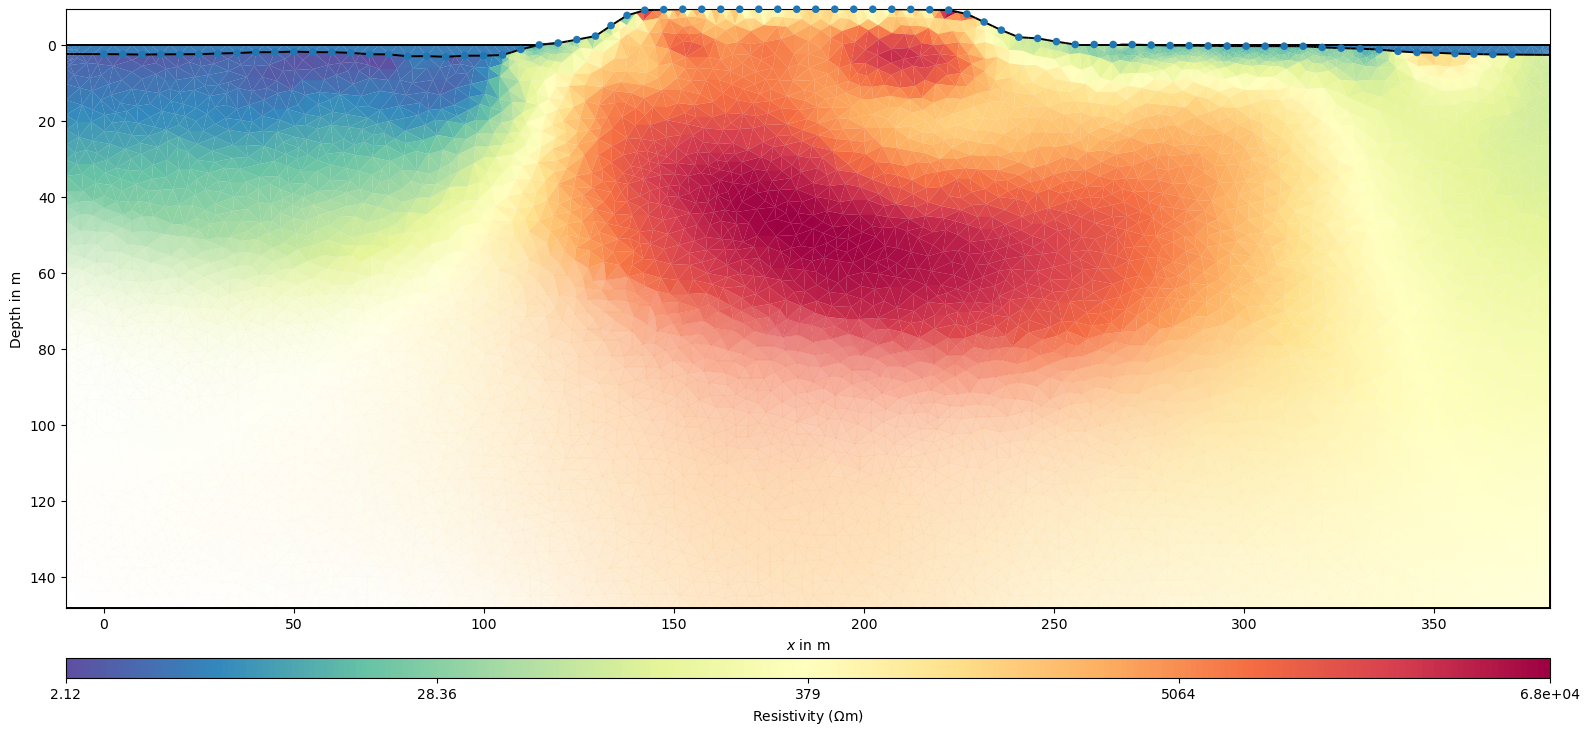

In [36]:
mgr.showResult(cMap="viridis_r", logScale=True)
mgr.saveResult(dir + 'pygimli/all_inversions/INV_eastern_new_rhoa_updated')